# Importing and understanding data:

In [1]:
import pandas as pd

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


*PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

*HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

*CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

*Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

*Destination - The planet the passenger will be debarking to.

*Age - The age of the passenger.

*VIP - Whether the passenger has paid for special VIP service during the voyage.

*RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

*Name - The first and last names of the passenger.

*Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [2]:
#in first glance name is irrelevant with data and ı don't want to examine cabin:
train = train.drop(["Name","Cabin"],axis=1)
test = test.drop(["Name","Cabin"],axis=1)
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [3]:
train.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [4]:
train.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

# Visualizing the data:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='VIP', ylabel='count'>

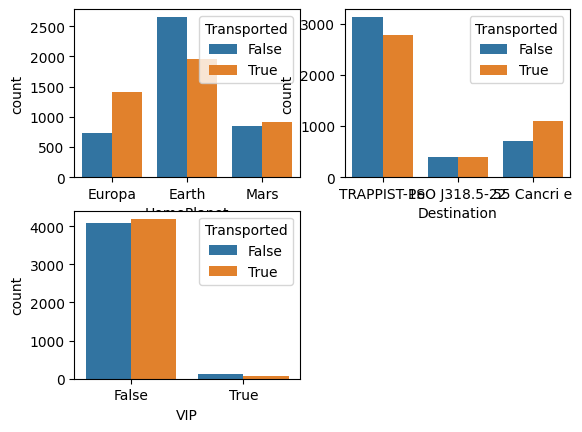

In [6]:
plt.subplot(2,2,1)
sns.countplot(x=train.HomePlanet,hue=train.Transported)
plt.subplot(2,2,2)
sns.countplot(x=train.Destination,hue=train.Transported)
plt.subplot(2,2,3)
sns.countplot(x=train.VIP,hue=train.Transported)

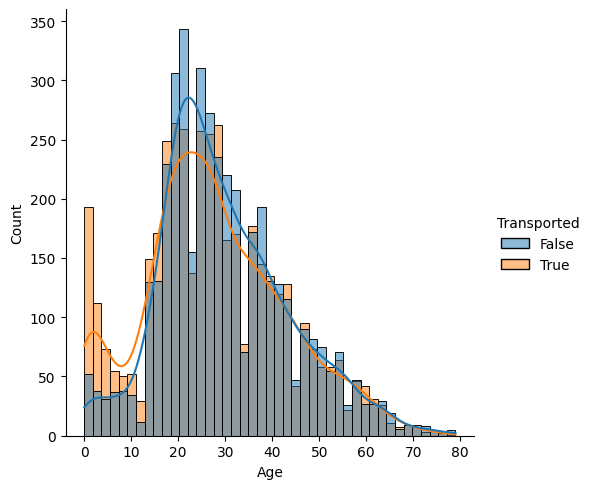

In [7]:
sns.displot(x=train.Age,hue=train.Transported,kde=True) #teens tend so survive

as seen with the graphs age destination and homeplanet has effected the tranport condition.
altough being VIP seems has no effect.

In [8]:
train = train.drop(["VIP"],axis=1)
test = test.drop(["VIP"],axis=1)

# Feature Engineering

In [9]:
x_train = train.drop(["Transported"],axis=1)
y_train = train.Transported

In [10]:
x_train["TotalSpent"] = train["RoomService"] + train["FoodCourt"] + train["ShoppingMall"] + train["Spa"] + train["VRDeck"]
test["TotalSpent"] = test["RoomService"] + test["FoodCourt"] + test["ShoppingMall"] + test["Spa"] + test["VRDeck"]

In [11]:
x_train = x_train.drop(["RoomService","FoodCourt","Spa","ShoppingMall","VRDeck"],axis=1)
test = test.drop(["RoomService","FoodCourt","Spa","ShoppingMall","VRDeck"],axis=1)

In [12]:
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,TotalSpent
0,0001_01,Europa,False,TRAPPIST-1e,39.0,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,1091.0


# NaN values:

In [13]:
x_train["HomePlanet"] = x_train["HomePlanet"].fillna("Earth")
test["HomePlanet"] = test["HomePlanet"].fillna("Earth")

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

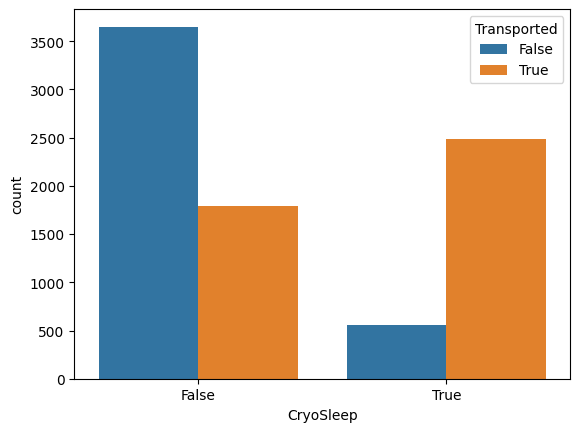

In [14]:
sns.countplot(x=train.CryoSleep,hue=train.Transported)

In [15]:
x_train["CryoSleep"] = x_train["CryoSleep"].fillna(False)
test["CryoSleep"] = test["CryoSleep"].fillna(False)

In [16]:
x_train["Destination"] = x_train["Destination"].fillna("TRAPPIST-1e")
test["Destination"] = test["Destination"].fillna("TRAPPIST-1e")

In [17]:
x_train["Age"] = x_train["Age"].fillna(int(x_train["Age"].mean()))
test["Age"] = test["Age"].fillna(int(test["Age"].mean()))

In [18]:
x_train["TotalSpent"] = x_train["TotalSpent"].fillna(int(x_train["TotalSpent"].mean()))
test["TotalSpent"] = test["TotalSpent"].fillna(int(test["TotalSpent"].mean()))

In [19]:
x_train.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Destination    0
Age            0
TotalSpent     0
dtype: int64

In [20]:
test.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Destination    0
Age            0
TotalSpent     0
dtype: int64

# Changing data to numerical values:

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x_train["HomePlanet"] = le.fit_transform(x_train["HomePlanet"])
x_train["Destination"] = le.fit_transform(x_train["Destination"])
x_train["CryoSleep"] = le.fit_transform(x_train["CryoSleep"])
test["HomePlanet"] = le.fit_transform(test["HomePlanet"])
test["Destination"] = le.fit_transform(test["Destination"])
test["CryoSleep"] = le.fit_transform(test["CryoSleep"])

In [22]:
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,TotalSpent
0,0001_01,1,0,2,39.0,0.0
1,0002_01,0,0,2,24.0,736.0
2,0003_01,1,0,2,58.0,10383.0
3,0003_02,1,0,2,33.0,5176.0
4,0004_01,0,0,2,16.0,1091.0


In [23]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,TotalSpent
0,0013_01,0,1,2,27.0,0.0
1,0018_01,0,0,2,19.0,2832.0
2,0019_01,1,1,0,31.0,0.0
3,0021_01,1,0,2,38.0,7418.0
4,0023_01,0,0,2,20.0,645.0


In [24]:
y_train.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [25]:
x_train = x_train.drop(["PassengerId"],axis=1)

In [26]:
test_passenger = test.PassengerId

In [27]:
test = test.drop(["PassengerId"],axis=1)

# XGboost

In [28]:
from xgboost import XGBClassifier

In [29]:
xg = XGBClassifier()

In [30]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [31]:
y_pred = xg.predict(test)
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [32]:
len(y_pred)

4277

In [33]:
len(test_passenger)

4277

In [34]:
test_passenger

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [35]:
xg_sub = pd.DataFrame({"PassengerId":test_passenger,"Transported":y_pred})
xg_sub.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0


# Transforming 1,0 to True,False

In [39]:
xg_sub=xg_sub.replace({0:False, 1:True})

In [40]:
xg_sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [42]:
xg_sub.to_csv("xg_sub2.csv")

# logistic regresion

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()

In [45]:
lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred2 = lr.predict(test)

In [48]:
y_pred2

array([ True, False,  True, ...,  True, False,  True])

In [49]:
lr_sub = pd.DataFrame({"PassengerId":test_passenger,"Transported":y_pred2})
lr_sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [50]:
lr_sub.to_csv("lr.sub1.csv")